In [1]:
import dask.dataframe as dd



%time df = dd.read_csv("flights.csv", encoding = 'ISO-8859-1')


CPU times: total: 15.6 ms
Wall time: 46.8 ms


In [2]:


df = dd.read_csv("flights.csv")  
df


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
npartitions=9,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,string,int64,string,string,string,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [3]:


df = dd.read_csv("flights.csv", assume_missing=True, dtype=str, encoding='ISO-8859-1')





In [4]:
df


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
npartitions=9,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
df.columns  # Check available columns


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [6]:
df["DEPARTURE_DELAY"] = dd.to_numeric(df["DEPARTURE_DELAY"], errors='coerce')
df["ARRIVAL_DELAY"] = dd.to_numeric(df["ARRIVAL_DELAY"], errors='coerce')
df["CANCELLED"] = dd.to_numeric(df["CANCELLED"], errors='coerce')
df["DIVERTED"] = dd.to_numeric(df["DIVERTED"], errors='coerce')



In [7]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
npartitions=9,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,string,string,string,string,string,string,string,string,string,string,string,Int64,string,string,string,string,string,string,string,string,string,string,Int64,Int64,Int64,string,string,string,string,string,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [8]:
df.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [9]:
avg_dep_delay = df.groupby("AIRLINE")["DEPARTURE_DELAY"].mean().compute().sort_values()
print(avg_dep_delay)



AIRLINE
HA     0.485713
AS     1.785801
US     6.141137
DL     7.369254
OO     7.801104
EV     8.715934
AA     8.900856
VX     9.022595
MQ    10.125188
WN    10.581986
B6    11.514353
F9    13.350858
UA    14.435441
NK    15.944766
Name: DEPARTURE_DELAY, dtype: Float64


In [10]:
df.groupby("AIRLINE")["FLIGHT_NUMBER"].count().compute().sort_values(ascending=False)


AIRLINE
WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: FLIGHT_NUMBER, dtype: int64

In [11]:
cancel_rate = (df["CANCELLED"].sum() / df.shape[0]).compute() * 100
print(f"Cancellation Rate: {cancel_rate:.2f}%")


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\dask\dataframe\dask_expr\_expr.py:562: RuntimeWarning: divide by zero encountered in scalar divide
  return self.operation(*args, **self._kwargs)


Cancellation Rate: 1.54%


In [12]:
df["DISTANCE"] = dd.to_numeric(df["DISTANCE"], errors='coerce')
route_delay = df.groupby(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])["ARRIVAL_DELAY"].mean().compute()
top_routes = route_delay.sort_values(ascending=False).head(10)
print(top_routes)


ORIGIN_AIRPORT  DESTINATION_AIRPORT
PHX             MHT                    NaN
EWR             JFK                    NaN
GSP             RIC                    NaN
MSO             BTM                    NaN
MSN             CWA                    NaN
SGF             HYS                    NaN
SWF             LGA                    NaN
LFT             BHM                    NaN
11973           15624                  NaN
GJT             ASE                    NaN
Name: ARRIVAL_DELAY, dtype: Float64


In [13]:
df["DISTANCE"] = dd.to_numeric(df["DISTANCE"], errors='coerce')
route_delay = df.groupby(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])["ARRIVAL_DELAY"].mean().compute()
top_routes = route_delay.sort_values(ascending=False).head(10)
print(top_routes)


ORIGIN_AIRPORT  DESTINATION_AIRPORT
PHX             MHT                    NaN
EWR             JFK                    NaN
GSP             RIC                    NaN
MSO             BTM                    NaN
MSN             CWA                    NaN
SGF             HYS                    NaN
SWF             LGA                    NaN
LFT             BHM                    NaN
11973           15624                  NaN
GJT             ASE                    NaN
Name: ARRIVAL_DELAY, dtype: Float64


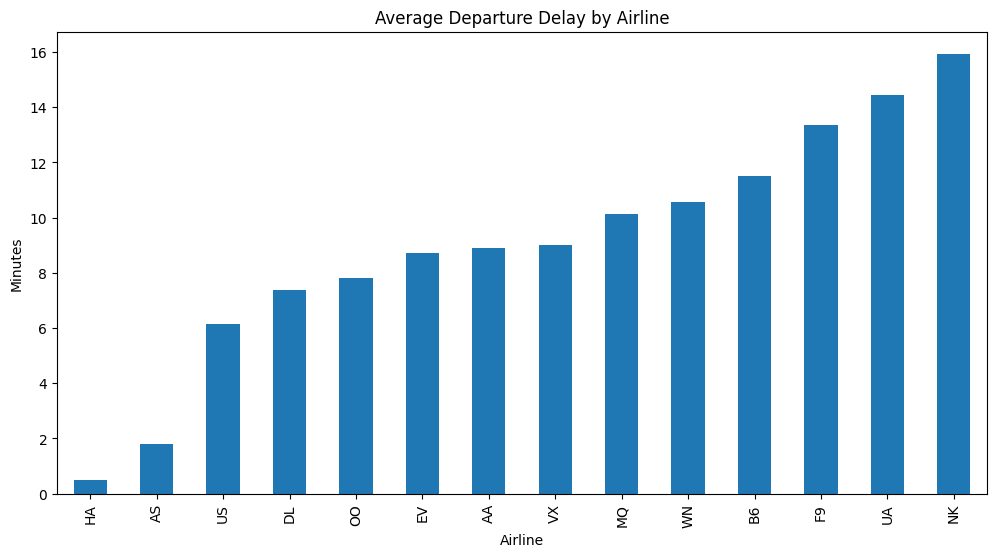

In [14]:
import matplotlib.pyplot as plt

avg_dep_delay.plot(kind='bar', figsize=(12,6))
plt.title("Average Departure Delay by Airline")
plt.ylabel("Minutes")
plt.xlabel("Airline")
plt.xticks(rotation=90)
plt.show()
